In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
from IPython.display import clear_output


In [2]:
def show_img(img):
    image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.show()

In [3]:
# clone from: https://github.com/opencv/opencv/tree/master/data/haarcascades
haarcascades_path = "./haarcascades/"

In [4]:
def img_processing(img):
    # do something here
    face_cascade = cv2.CascadeClassifier(haarcascades_path + 'haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier(haarcascades_path + 'haarcascade_eye.xml')
 
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,
                                          scaleFactor=1.2,
                                          minNeighbors=3,)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray,
                                            scaleFactor=1.02,
                                            minNeighbors=3,
                                            minSize=(40,40),)
        img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        for (ex,ey,ew,eh) in eyes:
            img = cv2.rectangle(img,(x+ex,y+ey),(x+ex+ew,y+ey+eh),(0,255,0),2)

    return img

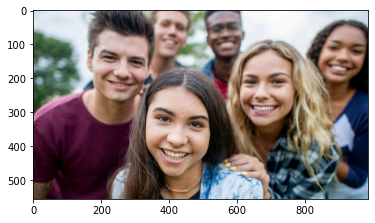

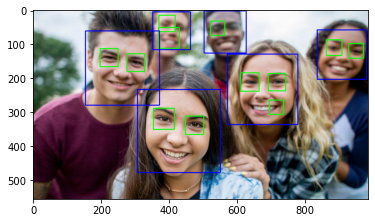

In [7]:
file_name = "./testdata/people.jpg"
origin_img = cv2.imread(file_name)
show_img(origin_img)

result_img = img_processing(origin_img)
show_img(result_img)